<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1MleNI0rcICpvrGd7SdYuQz7dn8NlAlEc" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Advanced Classification Models (Live coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>SIT Academy, 2022</center>

# Advanced Classification Models (Live coding)

__Topic covered__

- Logistic Regression
- KNN
- Naive Bayes
- SVM
- Decision Tree
- RandomForestClassifier
- AdaBoost
- Gradient Boosting
- XGBoost
- Feature Importance

# Load Dependencies

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset


We can pre-load the dataset with specific values (e.g., ?) depicting missing values (NaNs)



In [ ]:
# data_file = 'adult.csv'
orig_url = "https://drive.google.com/file/d/1Uw8vaoygdIiTC1AkOPj_42kg8lwD9nUB/view?usp=sharing"
file_id = orig_url.split('/')[-2]
data_file='https://drive.google.com/uc?export=download&id=' + file_id

df = pd.read_csv(data_file, na_values=['?', ''])
# dropping unnecessary column
df = df.drop(columns='fnlwgt')
df.head(10)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       46033 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


## Split Dataset into train and test Datsets

We split the dataset into a standard 70:30 train-test split using stratified sampling to keep the distributions of classes similar in train and test datasets

In [ ]:
X = df.drop(columns=['income'])
y = df['income']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape

((34189, 13), (14653, 13))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34189 entries, 38865 to 4610
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              34189 non-null  int64 
 1   workclass        32263 non-null  object
 2   education        34189 non-null  object
 3   educational-num  34189 non-null  int64 
 4   marital-status   34189 non-null  object
 5   occupation       32253 non-null  object
 6   relationship     34189 non-null  object
 7   race             34189 non-null  object
 8   gender           34189 non-null  object
 9   capital-gain     34189 non-null  int64 
 10  capital-loss     34189 non-null  int64 
 11  hours-per-week   34189 non-null  int64 
 12  native-country   33599 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.7+ MB


## Separate categorical and numeric columns

We will need to treat these features separately just like before

In [ ]:
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

categorical_features, numeric_features

(['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'gender',
  'native-country'],
 ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

# Training a Logistic Regression Model with Pipelines

We will show all the major steps needed to train your first classification model using sklearn pipelines which often makes the code more concise and you need lesser lines of code.

## Define Categorical Transformer Pipeline

Consists of the series of steps needed to tranform the categorical features. This includes: 

- Constant imputer to fill missing values
- One-hot encoder to get dummy variables

In [ ]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available')),
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])
categorical_transformer

Pipeline(steps=[('cat_imputer',
                 SimpleImputer(fill_value='Not Available',
                               strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

## Define Numeric Transformer Pipeline

Consists of the series of steps needed to tranform the numeric features. This includes: 

- K-nearest neighbor imputer to fill missing values
- Standard Scaler to scale the numeric features 

In [ ]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5)),
                                      ("scaler", StandardScaler())
                                      ])

numeric_transformer

Pipeline(steps=[('knn_imputer', KNNImputer()), ('scaler', StandardScaler())])

## Define Column Transformer Pipeline for preprocessing

Consists of the series of steps needed to tranform all the features in sequence

- Numeric Transfomer defined earlier
- Categorical Transfomer defined earlier

In [ ]:
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, 
                                                       numeric_features),
                                               ("cat", categorical_transformer, 
                                                       categorical_features)
                                               ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'educational-num', 'capital-gain',
                                  'capital-loss', 'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='Not '
                                                                           'Available',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationshi

## Initialize Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model

LogisticRegression(random_state=42, solver='liblinear')

## Build Modeling Pipeline

Chains the following steps:

- Preprocessing pipeline steps defined earlier
- Logistic Regression model defined earlier

In [ ]:
pipeline_lr = Pipeline(steps=[
                              ("pre_process", preprocessor), 
                              ("model", lr_model)
                              ])
pipeline_lr

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                              

## Train and Evaluate Logistic Regression ML Pipeline



In [ ]:
scores = {}

In [ ]:
pipeline_lr.fit(X_train, y_train)
y_pred = pipeline_lr.predict(X_test)

class_labels = pipeline_lr.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     11147
        >50K       0.74      0.60      0.66      3506

    accuracy                           0.85     14653
   macro avg       0.81      0.77      0.79     14653
weighted avg       0.85      0.85      0.85     14653



,<=50K,>50K
<=50K,10428,719
>50K,1408,2098


In [ ]:
f1_score(y_test, y_pred, average='weighted')

0.8491091000157509

In [ ]:
scores['log_reg'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

In [ ]:
scores

{'log_reg': 0.849}

## Train and Evaluate K Nearest Neighbors (KNN) ML Pipeline


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [ ]:
pipeline_knn = Pipeline([("pre_process", preprocessor), 
                         ("model", knn)])
pipeline_knn

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                              

In [ ]:
pipeline_knn.fit(X_train, y_train)
y_pred = pipeline_knn.predict(X_test)

class_labels = pipeline_knn.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.90     11147
        >50K       0.69      0.60      0.64      3506

    accuracy                           0.84     14653
   macro avg       0.78      0.76      0.77     14653
weighted avg       0.83      0.84      0.84     14653



,<=50K,>50K
<=50K,10180,967
>50K,1386,2120


In [ ]:
scores['knn'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

## Train and Evaluate Naive Bayes ML Pipeline


In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb

BernoulliNB()

In [ ]:
pipeline_nb = Pipeline([("pre_process", preprocessor), 
                         ("model", nb)])
pipeline_nb

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                              

In [ ]:
pipeline_nb.fit(X_train, y_train)
y_pred = pipeline_nb.predict(X_test)

class_labels = pipeline_nb.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

       <=50K       0.92      0.79      0.85     11147
        >50K       0.53      0.78      0.63      3506

    accuracy                           0.78     14653
   macro avg       0.73      0.78      0.74     14653
weighted avg       0.83      0.78      0.80     14653



,<=50K,>50K
<=50K,8780,2367
>50K,785,2721


In [ ]:
scores['nb'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

## Train and Evaluate SVM ML Pipeline


In [ ]:
from sklearn.svm import LinearSVC 

svc = LinearSVC(random_state=42, max_iter=10000)
svc

LinearSVC(max_iter=10000, random_state=42)

In [ ]:
pipeline_svc = Pipeline([("pre_process", preprocessor), 
                         ("model", svc)])
pipeline_svc

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                              

In [ ]:
pipeline_svc.fit(X_train, y_train)
y_pred = pipeline_svc.predict(X_test)

class_labels = pipeline_svc.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     11147
        >50K       0.75      0.59      0.66      3506

    accuracy                           0.86     14653
   macro avg       0.82      0.76      0.78     14653
weighted avg       0.85      0.86      0.85     14653



,<=50K,>50K
<=50K,10460,687
>50K,1434,2072


In [ ]:
scores['svm'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

### Tree-based models don't require data to be scaled 

Tree based models are non-linear and are not distance based models. Hence we will create a new transformation pipeline without scaling

In [ ]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available')),
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])

numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5)) # no standard scaling for numeric data
                                      ])

preprocessor_new = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, 
                                                       numeric_features),
                                               ("cat", categorical_transformer, 
                                                       categorical_features)
                                               ])

## Train and Evaluate Decision Tree ML Pipeline


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree

DecisionTreeClassifier(random_state=42)

In [ ]:
pipeline_dtree = Pipeline([("pre_process", preprocessor_new), 
                         ("model", dtree)])
pipeline_dtree

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Available',
                                                                                 strategy='constant')),
                

In [ ]:
pipeline_dtree.fit(X_train, y_train)
y_pred = pipeline_dtree.predict(X_test)

class_labels = pipeline_dtree.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.89     11147
        >50K       0.64      0.60      0.62      3506

    accuracy                           0.83     14653
   macro avg       0.76      0.75      0.76     14653
weighted avg       0.82      0.83      0.82     14653



,<=50K,>50K
<=50K,9976,1171
>50K,1385,2121


In [ ]:
scores['dtree'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

## Train and Evaluate Random Forest ML Pipeline


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(random_state=42)

In [ ]:
pipeline_rf = Pipeline([("pre_process", preprocessor_new), 
                         ("model", rf)])
pipeline_rf

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Available',
                                                                                 strategy='constant')),
                

In [ ]:
pipeline_rf.fit(X_train, y_train)
y_pred = pipeline_rf.predict(X_test)

class_labels = pipeline_rf.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     11147
        >50K       0.71      0.62      0.66      3506

    accuracy                           0.85     14653
   macro avg       0.80      0.77      0.78     14653
weighted avg       0.84      0.85      0.85     14653



,<=50K,>50K
<=50K,10275,872
>50K,1336,2170


In [ ]:
scores['rf'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

## Train and Evaluate AdaBoost ML Pipeline


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(random_state=42)
ada_boost

AdaBoostClassifier(random_state=42)

In [ ]:
pipeline_ada_boost = Pipeline([("pre_process", preprocessor_new), 
                         ("model", ada_boost)])
pipeline_ada_boost

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Available',
                                                                                 strategy='constant')),
                

In [ ]:
pipeline_ada_boost.fit(X_train, y_train)
y_pred = pipeline_ada_boost.predict(X_test)

class_labels = pipeline_ada_boost.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     11147
        >50K       0.78      0.60      0.68      3506

    accuracy                           0.86     14653
   macro avg       0.83      0.77      0.80     14653
weighted avg       0.86      0.86      0.86     14653



,<=50K,>50K
<=50K,10561,586
>50K,1396,2110


In [ ]:
scores['ada_boost'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

## Train and Evaluate Gradient Boosting ML Pipeline


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=42)
gbm

GradientBoostingClassifier(random_state=42)

In [ ]:
pipeline_gbm = Pipeline([("pre_process", preprocessor_new), 
                         ("model", gbm)])
pipeline_gbm

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Available',
                                                                                 strategy='constant')),
                

In [ ]:
pipeline_gbm.fit(X_train, y_train)
y_pred = pipeline_gbm.predict(X_test)

class_labels = pipeline_gbm.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92     11147
        >50K       0.80      0.60      0.69      3506

    accuracy                           0.87     14653
   macro avg       0.84      0.78      0.80     14653
weighted avg       0.87      0.87      0.86     14653



,<=50K,>50K
<=50K,10632,515
>50K,1389,2117


In [ ]:
scores['gbm'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

## Train and Evaluate Extreme Gradient Boosting (XGBoost) ML Pipeline


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb

XGBClassifier(random_state=42)

In [ ]:
pipeline_xgb = Pipeline([("pre_process", preprocessor_new), 
                         ("model", xgb)])
pipeline_xgb

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Available',
                                                                                 strategy='constant')),
                

In [ ]:
pipeline_xgb.fit(X_train, y_train)
y_pred = pipeline_xgb.predict(X_test)

class_labels = pipeline_xgb.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

       <=50K       0.88      0.96      0.92     11147
        >50K       0.81      0.59      0.69      3506

    accuracy                           0.87     14653
   macro avg       0.85      0.77      0.80     14653
weighted avg       0.87      0.87      0.86     14653



,<=50K,>50K
<=50K,10671,476
>50K,1431,2075


In [ ]:
scores['xgb'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

# Compare model performances

In [ ]:
result = pd.DataFrame({
    "Model" : scores.keys(),
    'F1-Score': scores.values()
})

result

,Model,F1-Score
0,log_reg,0.849
1,knn,0.836
2,nb,0.796
3,svm,0.849
4,dtree,0.824
5,rf,0.846
6,ada_boost,0.858
7,gbm,0.863
8,xgb,0.862


In [ ]:
list(scores.keys())

['log_reg', 'knn', 'nb', 'svm', 'dtree', 'rf', 'ada_boost', 'gbm', 'xgb']

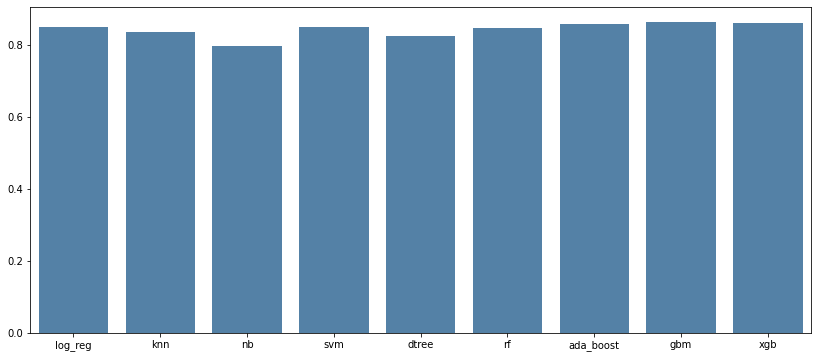

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=list(scores.keys()), 
            y=list(scores.values()), color="Steelblue");

# Feature Importance 

Trees based models like RandomForest, XGBoost, etc.  provide us feature importance based on the training.

In [ ]:
pipeline_xgb

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Available',
                                                                                 strategy='constant')),
                

In [ ]:
xgb_model = pipeline_xgb['model']
xgb_model

XGBClassifier(random_state=42)

In [ ]:
pipeline_xgb['pre_process']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer',
                                                  KNNImputer())]),
                                 ['age', 'educational-num', 'capital-gain',
                                  'capital-loss', 'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='Not '
                                                                           'Available',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race',
                 

In [ ]:
pipeline_xgb['pre_process'].transformers_

[('num',
  Pipeline(steps=[('knn_imputer', KNNImputer())]),
  ['age',
   'educational-num',
   'capital-gain',
   'capital-loss',
   'hours-per-week']),
 ('cat', Pipeline(steps=[('cat_imputer',
                   SimpleImputer(fill_value='Not Available',
                                 strategy='constant')),
                  ('onehot', OneHotEncoder(handle_unknown='ignore'))]), ['workclass',
   'education',
   'marital-status',
   'occupation',
   'relationship',
   'race',
   'gender',
   'native-country'])]

In [ ]:
pipeline_xgb['pre_process'].transformers_[0]

('num',
 Pipeline(steps=[('knn_imputer', KNNImputer())]),
 ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

In [ ]:
pipeline_xgb['pre_process'].transformers_[0][2]

['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [ ]:
num_features = list(pipeline_xgb['pre_process'].transformers_[0][2])
num_features

['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [ ]:
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [ ]:
pipeline_xgb['pre_process'].transformers_[1]

('cat', Pipeline(steps=[('cat_imputer',
                  SimpleImputer(fill_value='Not Available',
                                strategy='constant')),
                 ('onehot', OneHotEncoder(handle_unknown='ignore'))]), ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'gender',
  'native-country'])

In [ ]:
cat_features = list(pipeline_xgb['pre_process'].transformers_[1][1]['onehot'].get_feature_names(categorical_features))
cat_features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Not Available',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-clean

In [ ]:
feature_cols = num_features + cat_features

In [ ]:
xgb_model.feature_importances_

array([4.4105373e-02, 9.5328815e-02, 5.7148688e-02, 2.9015301e-02,
       3.4436803e-02, 1.3617546e-02, 2.8451099e-03, 0.0000000e+00,
       0.0000000e+00, 4.6591121e-03, 4.6344427e-03, 8.1642978e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.5129895e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.8814294e-03,
       0.0000000e+00, 1.4386159e-04, 7.3001685e-04, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.3684485e-03,
       3.5279593e-01, 0.0000000e+00, 1.3341841e-02, 0.0000000e+00,
       0.0000000e+00, 1.8899838e-03, 0.0000000e+00, 0.0000000e+00,
       6.0762726e-02, 1.9967305e-02, 1.6531417e-02, 1.0582189e-02,
       8.7302383e-03, 3.4537245e-02, 0.0000000e+00, 3.7687998e-02,
       7.7771307e-03, 2.8445339e-03, 8.6348625e-03, 1.5163649e-03,
       0.0000000e+00, 1.4593339e-02, 5.4165302e-03, 2.6599746e-02,
       7.8737950e-03, 1.0930579e-02, 0.0000000e+00, 2.1018579e

In [ ]:
xgb_importances = pd.DataFrame(
    {"feature": feature_cols, "importance": np.round(xgb_model.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
xgb_importances.head(20)

,importance
feature,
marital-status_Married-civ-spouse,0.353
educational-num,0.095
occupation_Exec-managerial,0.061
capital-gain,0.057
age,0.044
occupation_Prof-specialty,0.038
occupation_Other-service,0.035
hours-per-week,0.034
capital-loss,0.029


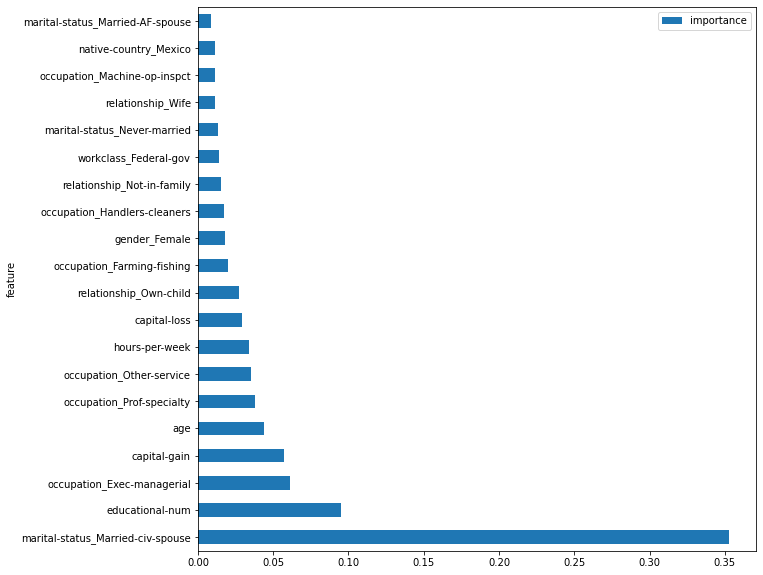

In [ ]:
f,ax = plt.subplots(figsize=(10,10)) 
xgb_importances.head(20).plot(kind="barh",ax=ax);